In [1]:
"""
Analysing the dataset created by run_example.sh
Modelling statistical predictions

TODO:
 - Tune processing and storing of observational data sets (to suite whatever code that will use the data sets)
 - Prototype naive prediction
 - Prototype linear regression
 - Prototype random forest
 - Prototype simple XGBoost
 - Prototype simple ANN (with Tensorflow and Keras?)
 - ...
"""

'\nAnalysing the dataset created by run_example.sh\nModelling statistical predictions\n\nTODO:\n - Tune processing and storing of observational data sets (to suite whatever code that will use the data sets)\n - Prototype naive prediction\n - Prototype linear regression\n - Prototype random forest\n - Prototype simple XGBoost\n - Prototype simple ANN (with Tensorflow and Keras?)\n - ...\n'

In [2]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
mydates = mdates.DateFormatter('%m-%d')

In [3]:
# Read the example data
data = pd.read_csv("example_dataset.csv")
N = len(data)

data["time"] = pd.to_datetime(data["time"])
data = data.set_index("time")

years = list(dict.fromkeys(list(data.index.year)))

In [4]:
# NOTE: Some of the libraries require special attention if the data contains NaNs
# For the time being we just remove those 

# Check the dataset for sanity 
# i.e. remove columns with only NaN
for column in data.columns:
    if data[column].isnull().values.any():
        print("Column", column, "gets removed since it contains NaN entries")
        del data[column]



Column SN19940wind_speed1 gets removed since it contains NaN entries
Column SN18700cloud_area_fraction1 gets removed since it contains NaN entries


In [5]:
# NOTE: Some columns contain only integer values

# Casting to all entries to floats
for column in data.columns:
    if data[column].dtype != "float64":
        data[column] = data[column].astype(float)

In [6]:
# Adding the previous water_temp as additonal trainings covariate
data["LASTwater_temp"] = data["water_temp"].shift(1)
data = data.iloc[1:, :]

2017
2018
2019
2020
/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:704: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:704: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:704: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:704: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


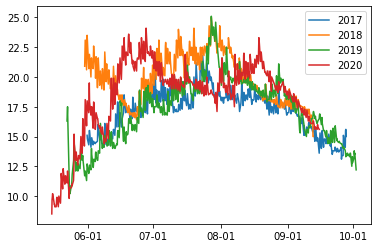

In [7]:
# Plotting water_temp
fig, ax = plt.subplots()
for year in years:
    print(year)
    start_time = datetime.datetime.strptime(str(year)+"-01-01T00:00 +0000", "%Y-%m-%dT%H:%M %z")
    end_time = datetime.datetime.strptime(str(year)+"-12-31T23:59 +0000", "%Y-%m-%dT%H:%M %z")
    ax.plot(data.loc[start_time:end_time].reset_index()["time"]+pd.offsets.DateOffset(year=2000),
        data["water_temp"].loc[start_time:end_time])

ax.xaxis.set_major_formatter(mydates)
plt.legend(years)